# Simulations vs Asymptotic AR1 benchmark

There is a discrepancy between the AR1 benchmark obtained from simulations vs the asymptotic solution frm Torrence and Compo. This notebook looks at the systematic difference.

Requirements:
Pyleoclim v0.7.4

In [1]:
import pyleoclim as pyleo
import numpy as np

## Perfect signal

Let's use a perfect signal with a periodicity of twenty years over 2000 years. 

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='value'>)

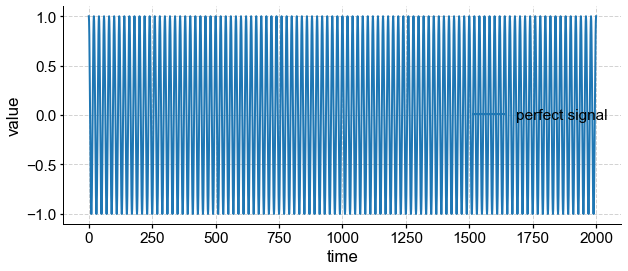

In [2]:
freq=1/20
time=np.arange(2001)
ys = np.cos(2*np.pi*freq*time)


ts = pyleo.Series(time=time,value=ys,label='perfect signal')
ts.plot()

Performing spectral analysis on individual series: 100%|█| 1000/1000 [01:09<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:03<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:03<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:28<00:0


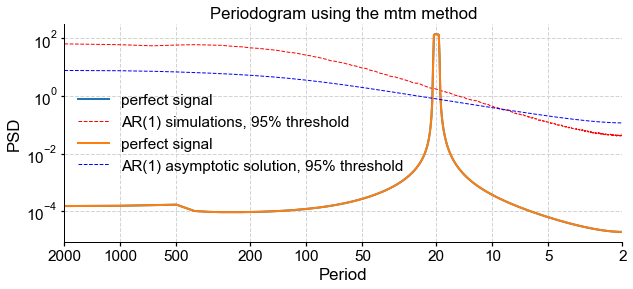

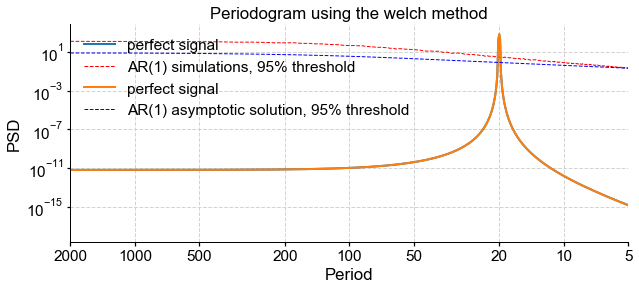

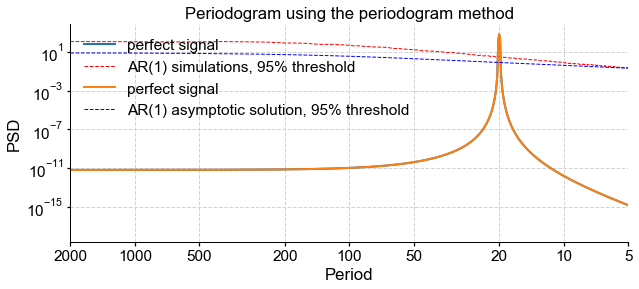

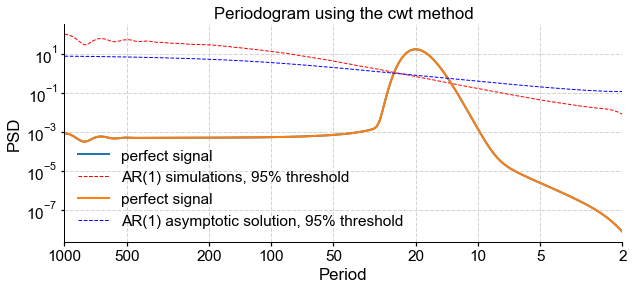

In [6]:
method = ['mtm', 'welch', 'periodogram', 'cwt']
for item in method:
    psd_sim = ts.spectral(method=item).signif_test(number=1000)
    psd_asym = ts.spectral(method=item).signif_test(method='ar1asym')
    fig,ax=psd_sim.plot(title='Periodogram using the '+item+' method')
    psd_asym.plot(ax=ax, signif_clr='blue')

### Increase the number of points

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='value'>)

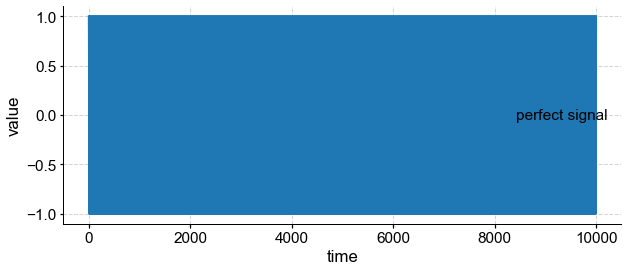

In [3]:
freq=1/20
time=np.arange(10001)
ys = np.cos(2*np.pi*freq*time)


ts_long = pyleo.Series(time=time,value=ys,label='perfect signal')
ts_long.plot()

Performing spectral analysis on individual series: 100%|█| 1000/1000 [08:12<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:13<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:14<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [25:34<00:0


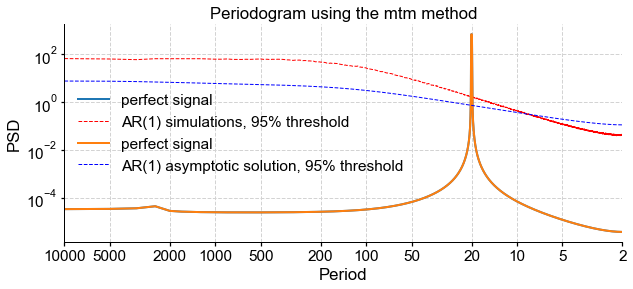

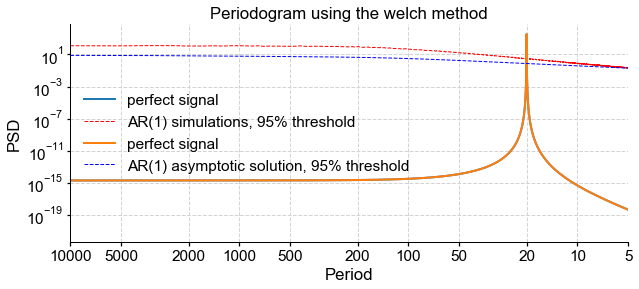

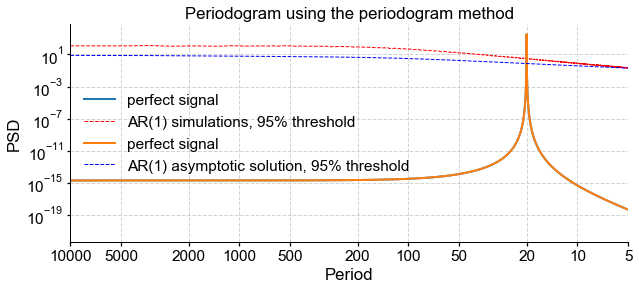

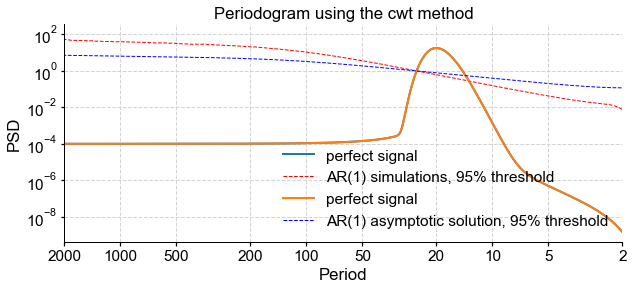

In [4]:
method = ['mtm', 'welch', 'periodogram', 'cwt']
for item in method:
    psd_sim = ts_long.spectral(method=item).signif_test(number=1000)
    psd_asym = ts_long.spectral(method=item).signif_test(method='ar1asym')
    fig,ax=psd_sim.plot(title='Periodogram using the '+item+' method')
    psd_asym.plot(ax=ax, signif_clr='blue')

## Noisy signal

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='value'>)

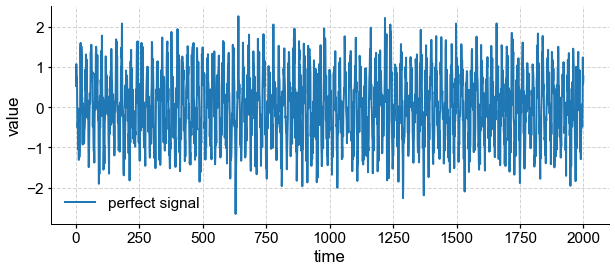

In [9]:
freq=1/20
time=np.arange(2001)
ys = np.cos(2*np.pi*freq*time)
sig_var = np.var(ys)
noise_var = sig_var / 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(ys))
ys = ys + white_noise


ts_noise = pyleo.Series(time=time,value=ys,label='perfect signal')
ts_noise.plot()

Performing spectral analysis on individual series: 100%|█| 1000/1000 [01:10<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:03<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:03<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:28<00:0


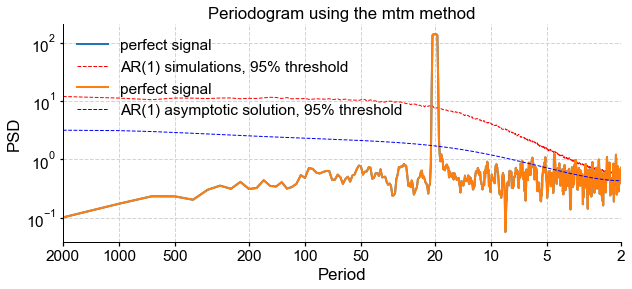

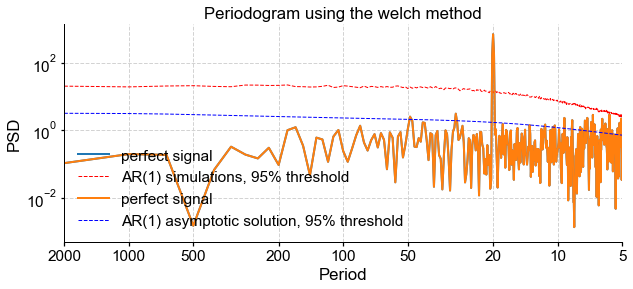

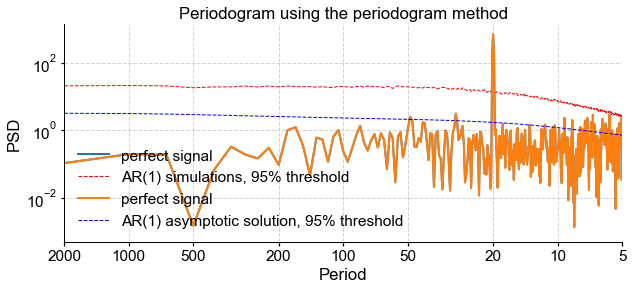

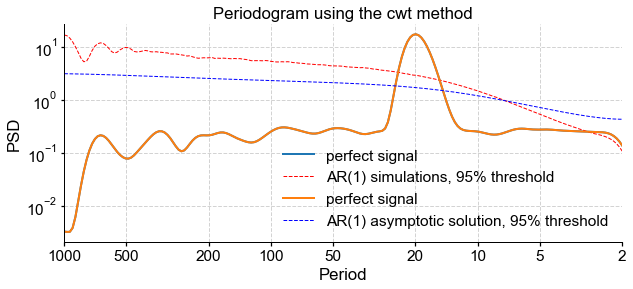

In [10]:
method = ['mtm', 'welch', 'periodogram', 'cwt']
for item in method:
    psd_sim = ts_noise.spectral(method=item).signif_test(number=1000)
    psd_asym = ts_noise.spectral(method=item).signif_test(method='ar1asym')
    fig,ax=psd_sim.plot(title='Periodogram using the '+item+' method')
    psd_asym.plot(ax=ax, signif_clr='blue')

## Intermittent signal

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='value'>)

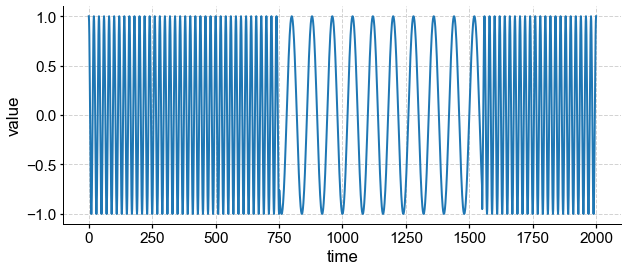

In [8]:
freq1=1/20
time1=np.arange(751)

freq2=1/80
time2=np.arange(751,1551,1)

time3=np.arange(1551,2001,1)

signal1=np.cos(2*np.pi*freq1*time1)
signal2=np.cos(2*np.pi*freq2*time2)
signal3=np.cos(2*np.pi*freq1*time3)

t = np.concatenate((time1,time2,time3))
signal = np.concatenate((signal1,signal2,signal3))

ts=pyleo.Series(time=t,value=signal)
ts.plot()

Performing spectral analysis on individual series: 100%|█| 1000/1000 [01:10<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:03<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:03<00:0
Performing spectral analysis on individual series: 100%|█| 1000/1000 [00:27<00:0


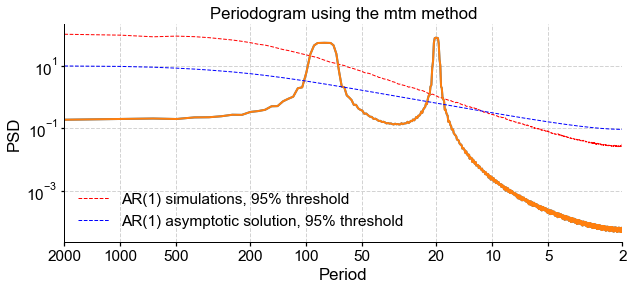

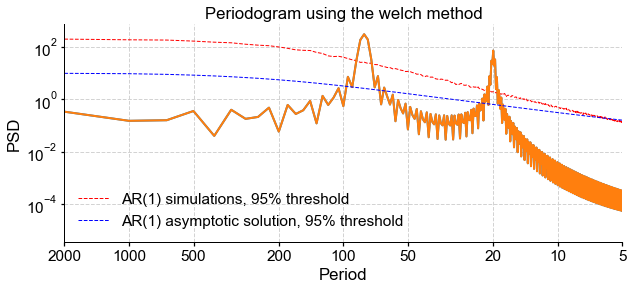

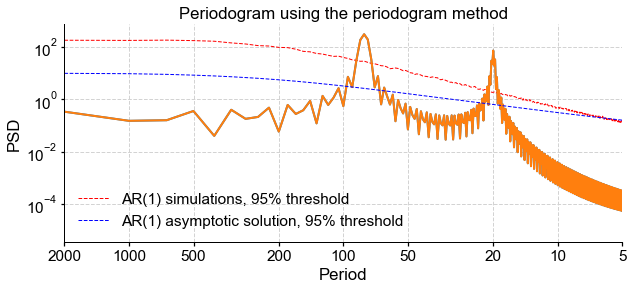

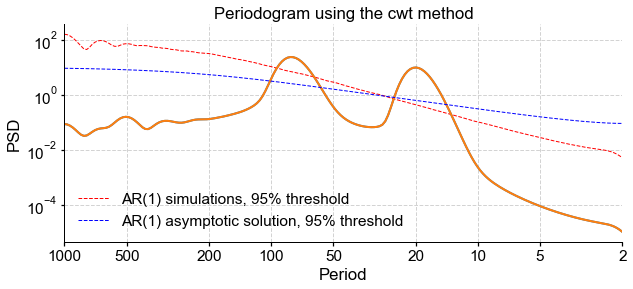

In [9]:
method = ['mtm', 'welch', 'periodogram', 'cwt']
for item in method:
    psd_sim = ts.spectral(method=item).signif_test(number=1000)
    psd_asym = ts.spectral(method=item).signif_test(method='ar1asym')
    fig,ax=psd_sim.plot(title='Periodogram using the '+item+' method')
    psd_asym.plot(ax=ax, signif_clr='blue')